# Regression Model that Predicts Apple Prices Based on Historical Data

<img src="predict.jpeg" height=400>

# Table Of Contents
### 1. [Introduction](#introduction)

    1. Objective
    2. Parameters
    3. Outline
    
### 2. [Importing Data and Plotting](#import)

    1. Import necessary packages
    2. Import the data into a Pandas Dataframe
    3. Show the data
    4. Make ean initial plot of the data

### 3. [Exploratory Data Analysis](#explore)
### 4. [Split Data: Testing and training](#split)
### 5. [Outliers](#outliers)
### 6. [Regression Model](#regress)
    1. Taking estimates
    2. Least squares
    3. sklearn
### 7. [Conclusion](#conclude)

## 1. Introduction <a name="introduction"></a>
In this b
There are various factors that contribute to the performance of a business.  Decisions to improve the performance have to be made given the known knowledge. In this project we are given data of Golden Delicious Apples and some parameters and will be  constructing a regression algorithm that will accurately predict how much a kilogram of the Apples will cost.


### 1.1. Objective 
Our objective with this notebook is to design various multivariate regression models using different machine learning techniques to predict the cost of apples based on given historical data. Our objective is further to train our models with the data, to assess our models with training as well as unseen testing data, and to choose the model that best predicts the prices of apples. We also finally need to communicate our findings to an assessment board and to the world.

### 1.2. Use 
This forms part of a Kaggle competition and is also a team assessment for the students at Explore Data Science Academy.
We hope that the research invested into building this product might also be used to further predictions of the prices of commodities and thereby help business in decision making.

### 1.3. Team members
The team consists of five full-time students from Explore Data Science Academy who come from all walks of life and have been placed in a team for about 4 weeks under the supervision of Trevor Senyane.
1. Jacques Stander - group coordinator
2. Khomotso Maake
3. Keletso Pule
4. Harrison Hlongwane
5. Bhalisa Sodo

### 1.4. Data source and descriptions
The data is provided for us on Kaggle in the form of two CSV files which is available to download. The data consists of 10 columns and is described as follows
1. Province - Which province the produce was grown
2. Container - The code for the type of container
3. Size_Grade - The class of the produce according to their quality
4. Weight_Kg - The total weight in kilograms
5. Commodities - The type of produce, e.g. Golden Delicious Apples
6. Date - The date of the sale
7. Sales_Total - The total sales price
8. Total_Qty_Sold - The number of produce sold
9. Total_Kg_Sold - The total weight of the produce sold in kilograms
10. Stock_On_Hand - The amount of produce the store has`

### 1.5. Submission format

The following table indicates the format in which we need to structure our final answer in submitting onto Kaggle. 

In [1]:
import pandas as pd
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
sample_submission.head()

Index  avg_price_per_kg
0      1             13.94
1      2              1.30

## 2. Exploratory Data Analysis <a name="import"></a>

### 2.1. Importing the necessary packages

In [2]:
# These packages will be mainly used for data wrangling. Pandas is already imported.
import numpy as np

# These packages will be mostly used for plotting the data
from matplotlib import pyplot as plt
import seaborn as sns

# These packages will be mostly used to build our linear regression model so that we can make predictions from it.
import statsmodels as sm
import sklearn as skl

### 2.2. Importing the data into a Pandas Dataframe

In [3]:
#import train and test sets into DataFrames
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
test_set = pd.DataFrame(pd.read_csv("df-test_set.csv"))
train_set = pd.DataFrame(pd.read_csv("df-train_set.csv"))

### 2.3. Showing the table head filtered for Apple Golden Delicious
We filter for Apple Golden Delicious, becuase we noted that out testing data only considers this commodity.

In [4]:
#Filter for Commodity of interest in train set
train_set = train_set[train_set["Commodities"]=="APPLE GOLDEN DELICIOUS"]

In [38]:
#Viewing the first five rows of our train_set dataframe.
train_set.head() 

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
1              332         6075.6            822              8.51  
7              320         3520.0              0              4.55  
24              18          162.0           1506              6.11  
40             388         7100.4            443              4.51  
69               1          400.0              2              4.50

### 2.4. Making initial plots of the data to learn more of the data

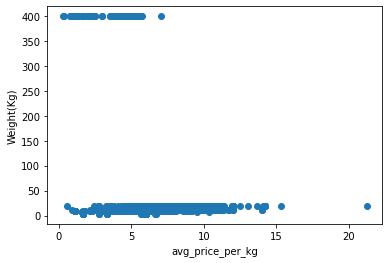

In [39]:
plt.scatter(train_set["avg_price_per_kg"], train_set['Weight_Kg'])
plt.ylabel("Weight(Kg)")
plt.xlabel("avg_price_per_kg")
plt.show()

We note that most of the apples have a weight lower than 25 kilogram and a few have a high weight of exactly 400 kilogram with no values inbetween. Apples at exactly 400 kg are considerable lower priced. We also note one outlier where an apple was sold for near R25.

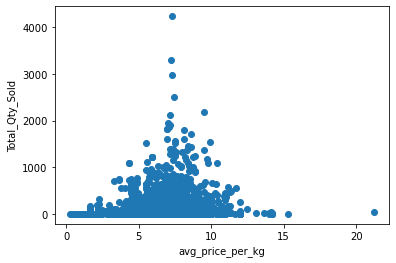

In [40]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Total_Qty_Sold'])
plt.ylabel("Total_Qty_Sold")
plt.xlabel("avg_price_per_kg")
plt.show()

We observe that for most of the average prices of apples per kilogram the total quantity sold is densley populated between 0-2000 apples with prices between R0-R15. There are a few outliers including one Total Quintity Sold of above 4000 apples.

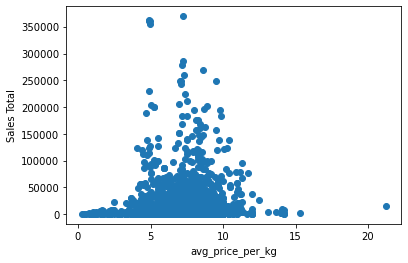

In [41]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Sales_Total'])
plt.ylabel("Sales Total")
plt.xlabel("avg_price_per_kg")
plt.show()

We observe that for most of the average prices the total sales is densley populated between R0-R200000. There are a few outliers once again of above R350 000.

### 2.5. Exploring the data shape, types and testing for null values

In [42]:
#The dataframe has 1952 rows and 13 columns.
train_set.shape

(1952, 13)

In [43]:
#The info method displays the nature of our data i.e datatypes and non-null count.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


The info summary above shows 1952 entries and it has the following data types: six float type data, two integer type data, five object type data with no null values.

### 2.6. How the  testing data differs from training data

Our Test_set data has 685 rows and 13 columns, our rows are smaller than the train data as expected since the bulk of our data will go into training our model.

The data types also differ in our test data, we have five float type data, three integer type data, five object type data. All columns showing zero null values. In the training data there are six float type and two integer type data.

Test_set statistics vary from train_set ones as we are working with a smaller data set in our test data.

### 2.7. Descriptive statistics of each feature:

In [44]:
train_set.describe()

Weight_Kg    Low_Price   High_Price    Sales_Total  Total_Qty_Sold  \
count  1952.000000  1952.000000  1952.000000    1952.000000     1952.000000   
mean     40.460912   174.307377   215.648053   20053.533811      174.510758   
std      99.655169   373.553578   433.546159   39005.069445      308.810797   
min       3.000000     2.000000     5.000000       5.000000        1.000000   
25%       9.000000    50.000000    60.000000    1325.000000       12.000000   
50%      12.000000    80.000000   108.000000    5495.000000       64.000000   
75%      18.300000   127.250000   160.000000   21082.500000      200.000000   
max     400.000000  2300.000000  3300.000000  369464.000000     4237.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count    1952.000000    1952.000000       1952.000000  
mean     2960.176332     408.393955          6.778893  
std      6097.416527     724.450582          2.248744  
min         3.000000       0.000000          0.250000  
25%       219.600000       9.000000          5.460000  
50%       853.500000     126.500000          6.670000  
75%      3093.525000     468.000000          8.280000  
max     74000.000000    6400.000000         21.240000

### 2.8. Calculating the kurtosis and skew of the data:

In [57]:
train_set.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

We observe that all the feautures are highly skewed in the positive direction except for the average price per kg (which is moderately skewed in a positive direction). For the high positive skewed feautures we have that mode < median < mean.

In [58]:
train_set.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

From the above, we observe that all the feautures have a high kurtosis besides the average price per kg. This indicates that all the feautures have a large number of outliers except for the average price.

### 2.9. More univariate graphical analysis


array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Sales_Total'}>]], dtype=object)

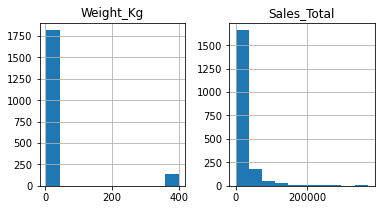

In [45]:
features = ['Weight_Kg', 'Sales_Total'] # create a list of all numerical features
train_set[features].hist(figsize=(6,3))

<AxesSubplot:xlabel='High_Price'>

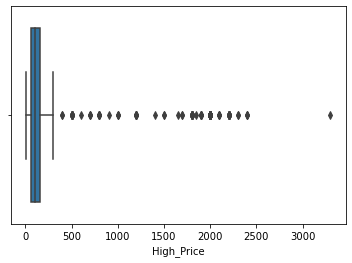

In [46]:
sns.boxplot(x='High_Price', data=train_set)

<AxesSubplot:xlabel='Low_Price'>

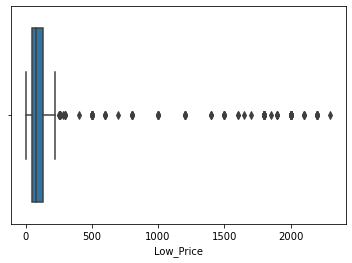

In [47]:
plt.subplot(sns.boxplot(x='Low_Price', data=train_set))

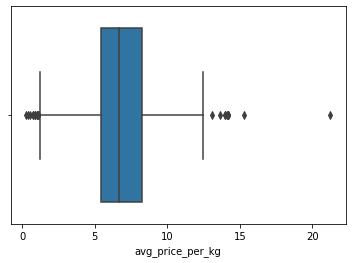

In [48]:
sns.boxplot(x='avg_price_per_kg', data=train_set);

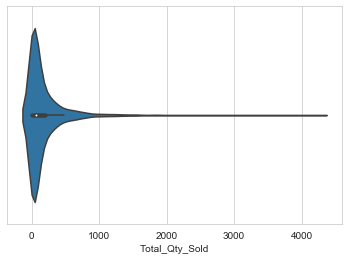

In [63]:
sns.violinplot(x='Total_Qty_Sold', data=train_set);

As expected, we observe that all the feautures are highly skewed to the right except for the average price per kg where outliers are taken into consideration.

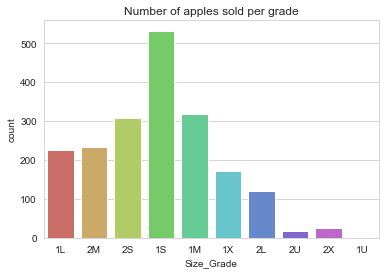

In [64]:
sns.countplot(x = 'Size_Grade', data = train_set, palette="hls")
plt.title("Number of apples sold per grade");

We see that the 1S size_Grade is the most sold.

### 2.10. Considering correlation between parameters 
We now examine the Pearson correlation between two variables:

In [66]:
train_set.corr()

Weight_Kg  Low_Price  High_Price  Sales_Total  \
Weight_Kg          1.000000   0.863182    0.905852     0.180518   
Low_Price          0.863182   1.000000    0.938140     0.183230   
High_Price         0.905852   0.938140    1.000000     0.265672   
Sales_Total        0.180518   0.183230    0.265672     1.000000   
Total_Qty_Sold    -0.133317  -0.122823   -0.096456     0.771865   
Total_Kg_Sold      0.294117   0.269744    0.372282     0.962338   
Stock_On_Hand     -0.144105  -0.127677   -0.094174     0.284693   
avg_price_per_kg  -0.337886  -0.141740   -0.164496     0.108473   

                  Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  \
Weight_Kg              -0.133317       0.294117      -0.144105   
Low_Price              -0.122823       0.269744      -0.127677   
High_Price             -0.096456       0.372282      -0.094174   
Sales_Total             0.771865       0.962338       0.284693   
Total_Qty_Sold          1.000000       0.651440       0.390168   
Total_Kg_Sold           0.651440       1.000000       0.229062   
Stock_On_Hand           0.390168       0.229062       1.000000   
avg_price_per_kg        0.087536      -0.001007       0.105028   

                  avg_price_per_kg  
Weight_Kg                -0.337886  
Low_Price                -0.141740  
High_Price               -0.164496  
Sales_Total               0.108473  
Total_Qty_Sold            0.087536  
Total_Kg_Sold            -0.001007  
Stock_On_Hand             0.105028  
avg_price_per_kg          1.000000

We observe that there is a strong relationship (Strong Positive Correlation) between the following variables only:
1. Weight and High price
2. Total Sales and Total Kg Sold 
3. Weight and Low Price



We can also show the Correlation between two variables using a heatmap and derive the same insights as above:

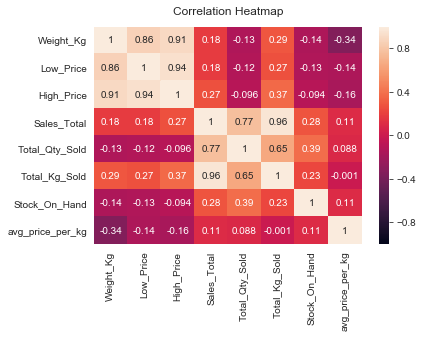

In [67]:
heatmap = sns.heatmap(train_set.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
train1 = train_set.copy()

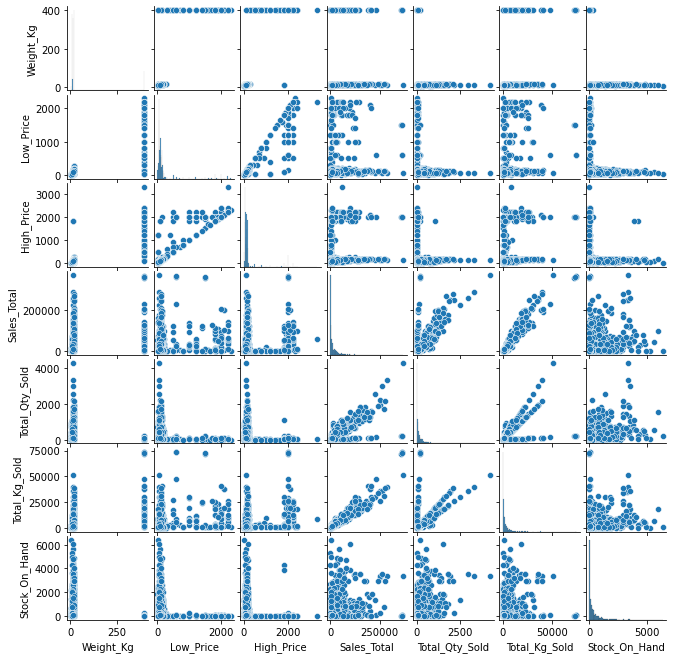

In [32]:
g = pairplot(train1.drop('avg_price_per_kg', axis='columns'))
g.fig.set_size_inches(9,9)

### 2.11 Insights from an in-colour scatter plot

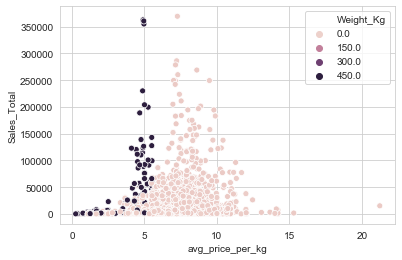

In [68]:
sns.scatterplot(x='avg_price_per_kg',y='Sales_Total',hue='Weight_Kg', data=train_set);

We observe that apples with a lower average price has a higher weight. We also observe that a lot of the apples which are sold have a low weight.

### 2.12. Testing for linearity

In [30]:
# Import Neccessary Packages
from seaborn import pairplot
from statsmodels.graphics.correlation import plot_corr

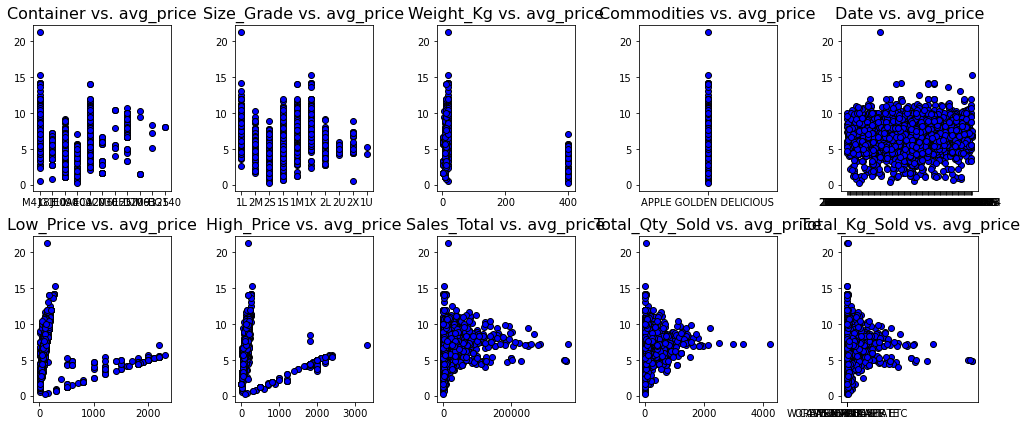

In [35]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.columns):
    if(index<=10):
        axs[index-1].set_title("{} vs. avg_price".format(column),fontsize=16)
        axs[index-1].scatter(x=train_set[column],y=train_set['avg_price_per_kg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

We observe that there exists a linear relationship between each predictor varible and avg_price_per_kg except Low_Price and High_Price and commoditites that was filtered for Apple Golden Delicious in the beginning. Thus all values can be used. Low_Price and High_Price are correlated with each other.

### 3. Data pre-processing

### 3.1. Transforming categorical data to numerical data 

In [5]:
#Convert categorical data to numerical data
train=train_set.copy()
for i in train.index:
    train.loc[i,"Date"]=train.loc[i,"Date"][:7]
train=pd.get_dummies(train,drop_first=True)

#Replace spaces in column names with underscores
train.columns = train.columns.str.replace(' ','_')

In [51]:
train.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
1        18.3      150.0       170.0      51710.0             332   
7        11.0       50.0        50.0      16000.0             320   
24        9.0       55.0        55.0        990.0              18   
40       18.3       80.0       120.0      32020.0             388   
69      400.0     1800.0      1800.0       1800.0               1   

    Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province_EASTERN_CAPE  \
1          6075.6            822              8.51                      0   
7          3520.0              0              4.55                      0   
24          162.0           1506              6.11                      0   
40         7100.4            443              4.51                      0   
69          400.0              2              4.50                      1   

    Province_NATAL  ...  Date_2020-01  Date_2020-02  Date_2020-03  \
1                0  ...             0             0             0   
7                0  ...             0             0             0   
24               0  ...             0             0             0   
40               0  ...             0             0             0   
69               0  ...             0             0             0   

    Date_2020-04  Date_2020-05  Date_2020-06  Date_2020-07  Date_2020-08  \
1              0             0             0             0             0   
7              1             0             0             0             0   
24             1             0             0             0             0   
40             0             1             0             0             0   
69             0             0             0             0             0   

    Date_2020-09  Date_2020-10  
1              1             0  
7              0             0  
24             0             0  
40             0             0  
69             1             0  

[5 rows x 43 columns]

In [6]:
train.shape

(1952, 43)

In [6]:
cols = list(train)
#Move column to last index
cols.insert(len(cols)-1,cols.pop(cols.index("avg_price_per_kg")))

#Update column names
train = train.loc[:, cols]

## 4. Data Splitting 

The data is alreayd conveniently split for us into two CSV files namely training data and testing data both of which was already described above. We noted that the testing data is only concerned with Appled Golden Delicious commoditiy and is considerably smaller in size.
Because of this there will be no need for cross-validation or a verification.

## 5. Building the regression models <a name="regress"></a>
### 5.1. Method 1: A simple linear reggression model following the Least Squares Method
#### 5.1.1. Calculating the slope and the intercept 

In [55]:
#Split predictors and response
X = train_set['Weight_Kg']
Y = train_set['avg_price_per_kg']

#Calculating x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

#Calculating Slope
b = sum((X-x_bar) * (Y-y_bar)) / sum((X-x_bar)**2)

#Calculating intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = -0.0076244934807224145
Intercept = 7.0873874015160885


#### 5.1.2. Plotting our regression line on a scatter plot

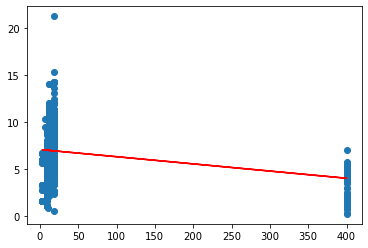

In [56]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)

    return(y_gen)

#Generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(X, a, b)

#Plot the graph
plt.scatter(X, Y)
plt.plot(X, y_gen2, color='red')
plt.show()

#### Regression for least squres with best fit line

#### 5.1.3. Assessing our results

In [61]:
errors = np.array(Y - y_gen2)
np.round(errors, 2)

array([ 1.56, -2.45, -0.91, ..., -1.35, -4.22,  0.61])

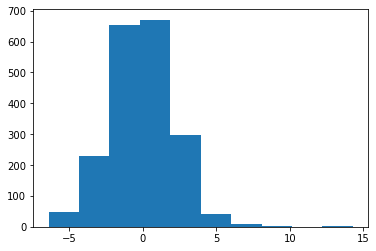

In [62]:
plt.hist(errors)
plt.show()

It seems that our prediction is quote accurate only considering the training data and only considering the weight column as an independent variable. This however is not satisfactory since our model is univariate and multiple conditions need to be taken into account.

In [63]:
# Overall error of the fit
print('Residual Sum of Squares:', (errors ** 2).sum())

Residual Sum of Squares: 8739.552582265216


In [64]:
#Mean Squared Error to assess fit of model
print('MSE:', (1/len(X))*(errors ** 2).sum())

MSE: 4.477229806488328


There is no 'correct' Mean Squared Error. The model's MSE is ~ 4.5 units from a perfect fit (MSE=0)

In [65]:
# R Squared method to assess fit of model
print("R^2:", 1 - (errors**2).sum()/((Y - y_bar)**2).sum())

R^2: 0.11416723112994909


R Squared is closer to 0 than it is to 1. This indicates that the regression does not explain much of the variability in the response.

### 5.2. Method 2: A multivariate linear regression model using sklearn

#### Building and fitting the model

In [101]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [102]:
X = train.drop(['avg_price_per_kg'], axis = 1)
Y = train['avg_price_per_kg']

In [ ]:
# create model object
lm = LinearRegression()

In [ ]:
# import train/test split module\n",
from sklearn.model_selection import train_test_split

In [103]:
# split into train and test\n",
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                  test_size=0.20,
                                                  random_state=1)

In [104]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [105]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [107]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [108]:
print("Intercept:", beta_0)

Intercept: 10.179466980467078


In [110]:
# shows coefficients table
beta_js.head(7)

Coefficient
Weight_Kg         -0.010376
Low_Price          0.000392
High_Price         0.001127
Sales_Total        0.000052
Total_Qty_Sold    -0.001981
Total_Kg_Sold     -0.000262
Stock_On_Hand     -0.000003

#### Plot our results

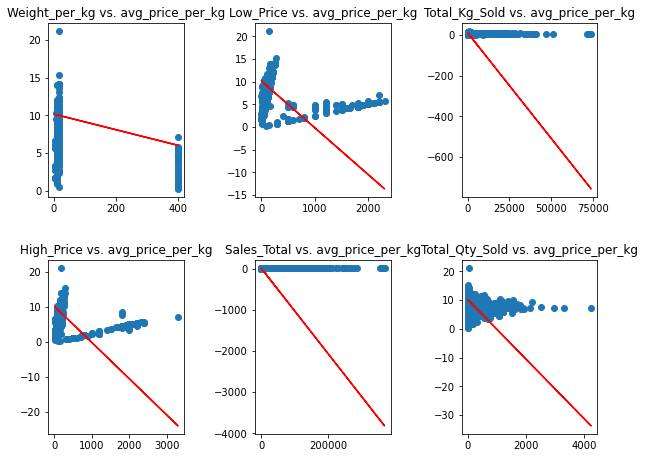

In [115]:
# plotting the relationships between Y and various predictors
fig, axs = plt.subplots(2, 3, figsize=(9,7))

axs[0,0].scatter(train['Weight_Kg'], train['avg_price_per_kg'])
axs[0,0].plot(train['Weight_Kg'], lm.intercept_ + lm.coef_[0]*train['Weight_Kg'], color='red')
axs[0,0].title.set_text('Weight_per_kg vs. avg_price_per_kg')
    
axs[0,1].scatter(train['Low_Price'], train['avg_price_per_kg'])
axs[0,1].plot(train['Low_Price'], lm.intercept_ + lm.coef_[0]*train['Low_Price'], color='red')
axs[0,1].title.set_text('Low_Price vs. avg_price_per_kg')
    
axs[1,0].scatter(train['High_Price'], train['avg_price_per_kg'])
axs[1,0].plot(train['High_Price'], lm.intercept_ + lm.coef_[0]*train['High_Price'], color='red')
axs[1,0].title.set_text('High_Price vs. avg_price_per_kg')
    
axs[1,1].scatter(train['Sales_Total'], train['avg_price_per_kg'])
axs[1,1].plot(train['Sales_Total'], lm.intercept_ + lm.coef_[0]*train['Sales_Total'], color='red')
axs[1,1].title.set_text('Sales_Total vs. avg_price_per_kg')
    
axs[1,2].scatter(train['Total_Qty_Sold'], train['avg_price_per_kg'])
axs[1,2].plot(train['Total_Qty_Sold'], lm.intercept_ + lm.coef_[0]*train['Total_Qty_Sold'], color='red')
axs[1,2].title.set_text('Total_Qty_Sold vs. avg_price_per_kg')
    
axs[0,2].scatter(train['Total_Kg_Sold'], train['avg_price_per_kg'])
axs[0,2].plot(train['Total_Kg_Sold'], lm.intercept_ + lm.coef_[0]*train['Total_Kg_Sold'], color='red')
axs[0,2].title.set_text('Total_Kg_Sold vs. avg_price_per_kg')
    
fig.tight_layout(pad=3.0)
    
plt.show()

#### Assess our results

### Method 3: A multivariate linear regression model using statsmodels

#### Show our calculations

In [7]:
#Importing the statsmodels package
import statsmodels.formula.api as sm

The Date is still giving us the same error even though we removed the day:"PatsyError:numbers besides '0' and '1' are only allowed with**".It was then left out of our stats models. It also stated that "Province_W.CAPE-BERGRIVER_ETC" was not defined,we dropped that column as well.

In [8]:
#Creating a copy of the train to work on, so any changes we make do not affect the original dataframe
train2 = train.copy()

In [9]:
#Droping the column from our copy of the train dataframe. 
train2 = train2[train2["Province_W.CAPE-BERGRIVER_ETC"] == 1]
train2 = train2.drop(["Province_W.CAPE-BERGRIVER_ETC"], axis=1)

In [10]:
#Generating the regression string
formula_str = train2.columns[-1]+' ~ '+'+'.join(train2.columns[0:31]); formula_str

'avg_price_per_kg ~ Weight_Kg+Low_Price+High_Price+Sales_Total+Total_Qty_Sold+Total_Kg_Sold+Stock_On_Hand+Province_EASTERN_CAPE+Province_NATAL+Province_ORANGE_FREE_STATE+Province_TRANSVAAL+Province_WEST_COAST+Container_DT063+Container_EC120+Container_EF120+Container_EG140+Container_IA400+Container_JE090+Container_JG110+Container_M4183+Container_M6125+Container_M9125+Size_Grade_1M+Size_Grade_1S+Size_Grade_1U+Size_Grade_1X+Size_Grade_2L+Size_Grade_2M+Size_Grade_2S+Size_Grade_2U+Size_Grade_2X'

In [11]:
#Constructing the model using Ordinary Least Squares regression model
model2 = sm.ols(formula = formula_str, data = train2)


In [12]:
#Fitting the OLS model we constructed above
fitted = model2.fit()

In [13]:
#Viewing the fitted model summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     68.19
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.31e-115
Time:                        08:07:19   Log-Likelihood:                -639.54
No. Observations:                 440   AIC:                             1319.
Df Residuals:                     420   BIC:                             1401.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Plot our results

In [14]:
#Importing packages to show how our predictor variables interact with our reponse variable
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

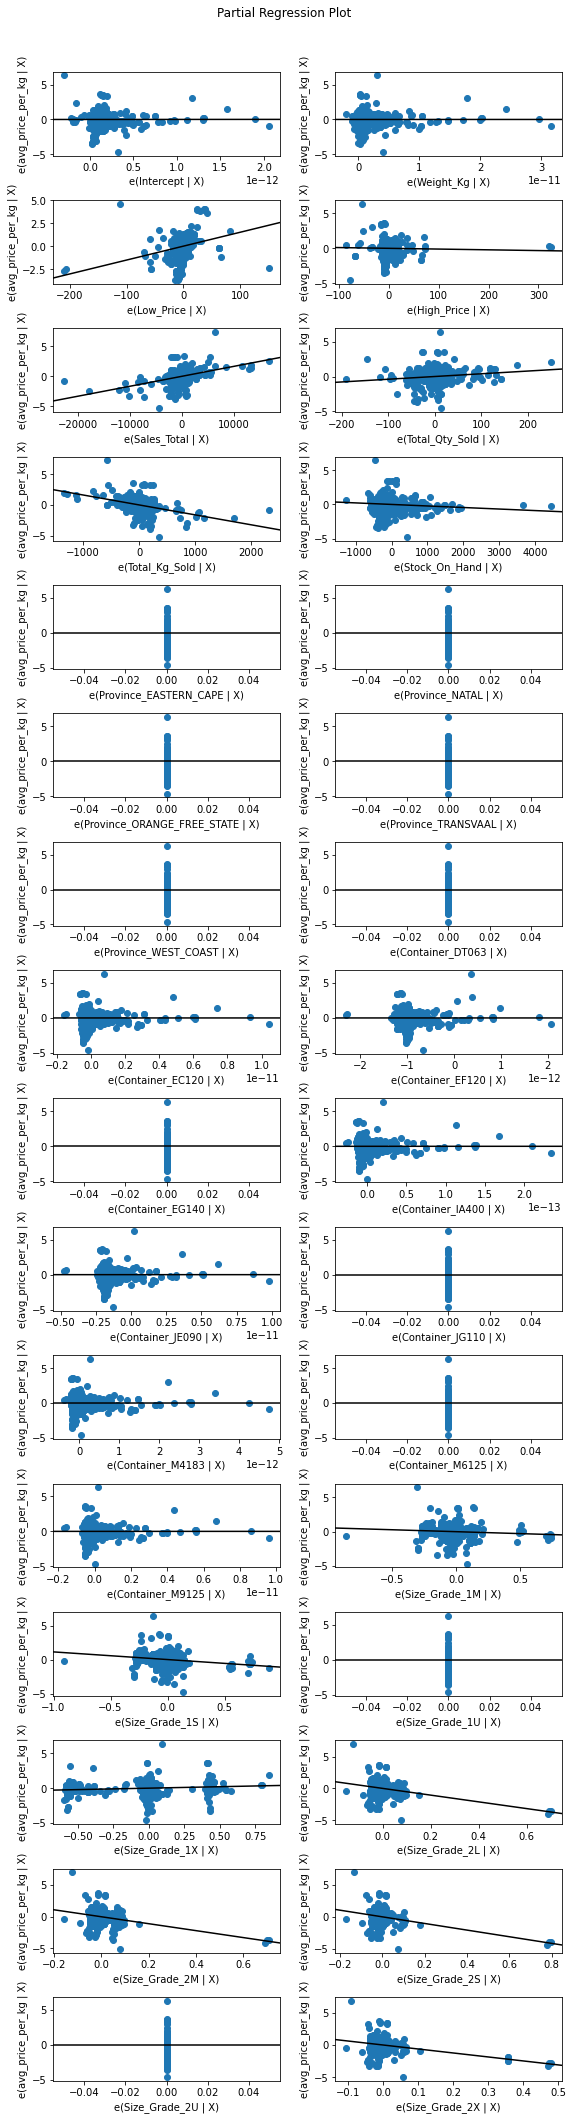

In [15]:
#Ploting partial regression plots
fig = plt.figure(figsize=(8, 30))
plot_partregress_grid(fitted, fig=fig)
plt.show()

#### Assess our results

Our partial regression plots show us how avg_price_per_kg which is our dependent variable interact with all our independent varibbles. The following independent variables seem to have a linear relationship with avg_price_per_kg: Sales_Total, Total_kg_sold and Size_Grade.

#### Testing for independence
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


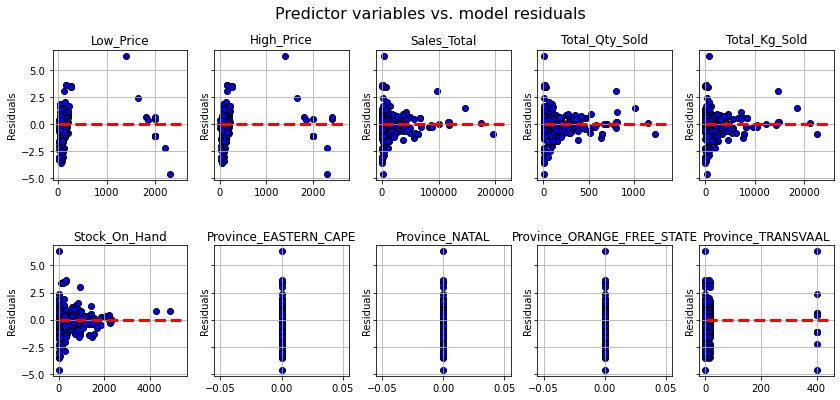

In [23]:
#Ploting Residuals vs Predictor Variable Plots
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(train2.columns):
    if(index<=10):
        axs[index-1].set_title("{}".format(column),fontsize=12)
        axs[index-1].scatter(x=train2[column],y=fitted.resid,color='blue',edgecolor='k')
        axs[index-1].grid(True)
        xmin = min(train2[column])
        xmax = max(train2[column])
        axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
        axs[index-1].set_ylabel('Residuals')

#### Testing for homoscedasticity
Do the magnitude of the risiduals increase as the fitted data increases? This will result in a cone shape and that is called heteroscedasticity. We don’t want that.
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


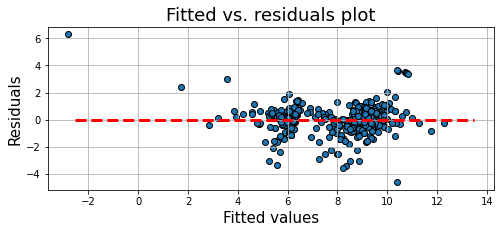

In [21]:
#plotting our fitted model vs. residuals
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

#### Testing for normality
Multiple Linear Regression - Advanced Regression Analysis [Notebook]
Include the QQ plot


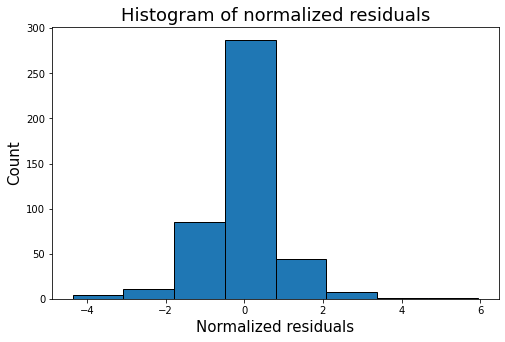

In [24]:
#Plotting Histogram of Normalized Residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

Q-Q plot of normalized residuals

In [25]:
#Importing Q-Qplot from stats models 
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

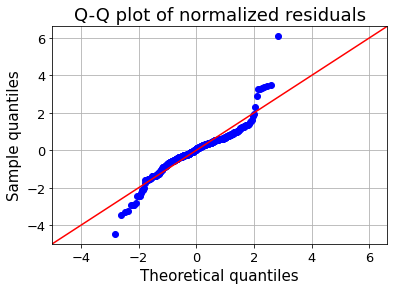

In [26]:
#Plotting a Q-Q plot of the normalized residuals
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

#### Check for outliers in residuals <a name="outliers"></a>

#### Plot Cook’s distance
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


In [27]:
#Importing OLSInfluence from stats models outliers_influence
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [28]:
#Applying influence on our OLS model:fitted
inf=influence(fitted)

C:\Users\olive\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:713: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)


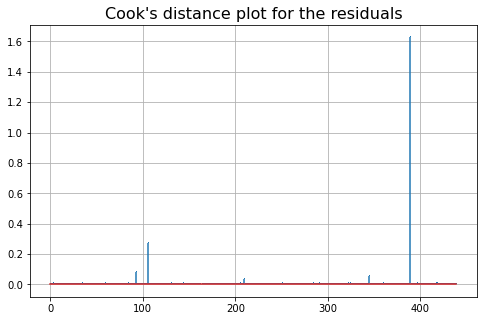

In [29]:
#Plotting cooks distance plot for the residuals
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

### Variable Selection by Correlation and Significance

In [52]:
train_set_dummies=train_set.copy()
for i in train_set_dummies.index:
    train_set_dummies.loc[i,"Date"]=train_set_dummies.loc[i,"Date"][:7]
train_set_dummies = pd.get_dummies(train_set_dummies)

# Again we make sure that all the column names have underscores instead of whitespaces
train_set_dummies.columns = [col.replace(" ","_") for col in train_set_dummies]

train_set_dummies.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
1        18.3      150.0       170.0      51710.0             332   
7        11.0       50.0        50.0      16000.0             320   
24        9.0       55.0        55.0        990.0              18   
40       18.3       80.0       120.0      32020.0             388   
69      400.0     1800.0      1800.0       1800.0               1   

    Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province_CAPE  \
1          6075.6            822              8.51              1   
7          3520.0              0              4.55              1   
24          162.0           1506              6.11              0   
40         7100.4            443              4.51              1   
69          400.0              2              4.50              0   

    Province_EASTERN_CAPE  ...  Date_2020-01  Date_2020-02  Date_2020-03  \
1                       0  ...             0             0             0   
7                       0  ...             0             0             0   
24                      0  ...             0             0             0   
40                      0  ...             0             0             0   
69                      1  ...             0             0             0   

    Date_2020-04  Date_2020-05  Date_2020-06  Date_2020-07  Date_2020-08  \
1              0             0             0             0             0   
7              1             0             0             0             0   
24             1             0             0             0             0   
40             0             1             0             0             0   
69             0             0             0             0             0   

    Date_2020-09  Date_2020-10  
1              1             0  
7              0             0  
24             0             0  
40             0             0  
69             1             0  

[5 rows x 48 columns]

In [24]:
train_set_dummies.shape

(1952, 48)

In [129]:
column_titles = [col for col in train_set_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
train_set_dummies=train_set_dummies.reindex(columns=column_titles)


In [134]:
# Calculate correlations between predictor variables and the response variable
corrs = train_set_dummies.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [160]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = train_set_dummies.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + Province_CAPE + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W.CAPE-BERGRIVER_ETC + Province_WEST_COAST + Container_AC030 + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1L + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X + Commodities_APPLE_GOLDEN_DELICIOUS + Date_2019-12-11 + Date_2019-12-12 + Date_2019-12-14 + Date_2019-12-23 + Date_2019-12-30 + Date_2020-01-02 + Date_2020-01-03 + Date_2020-01-04 + Date_2020-01-06 + Date_2020-01-08 + Date_2020-01-09 + Date_2020-01-10 + Date_2020-01-11 + Date_2020-01-13 + Date_2020-01-14 + Date_2020-01-16 + Date_2020-01-20 + Date_202

In [144]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     137.3
Date:                Thu, 13 May 2021   Prob (F-statistic):          1.46e-248
Time:                        22:34:41   Log-Likelihood:                -3750.7
No. Observations:                1952   AIC:                             7527.
Df Residuals:                    1939   BIC:                             7600.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#Consider the size of the condition number and the range of the coefficients and expected errors vs absolute size of the coefficients themselves.
1. The condition number is large, 6.56e+05.


We will Store the correlation coefficeints and p-values in a separate DataFrame for reference.

In [147]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= '']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

train_set_cp = pd.DataFrame(dict_cp).T
train_set_cp_sorted = train_set_cp.sort_values('P_Value')
train_set_cp_sorted[train_set_cp_sorted['P_Value']<0.1]

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Correlation_Coefficient   P_Value
avg_price_per_kg                              1.000000  0.000000
Size_Grade_2S                                -0.352996  0.000000
Weight_Kg                                    -0.337886  0.000000
Container_JE090                              -0.322235  0.000000
Province_EASTERN_CAPE                        -0.178531  0.000000
High_Price                                   -0.164496  0.000000
Size_Grade_2M                                -0.153372  0.000000
Container_AC030                              -0.144427  0.000000
Low_Price                                    -0.141740  0.000000
Container_JG110                              -0.140148  0.000000
Container_IA400                              -0.355565  0.000000
Province_NATAL                               -0.379801  0.000000
Container_EF120                               0.114297  0.000000
Size_Grade_1M                                 0.175779  0.000000
Container_EC120                               0.188162  0.000000
Size_Grade_1X                                 0.251451  0.000000
Province_W.CAPE-BERGRIVER_ETC                 0.262051  0.000000
Size_Grade_1L                                 0.280966  0.000000
Container_M4183                               0.403229  0.000000
Sales_Total                                   0.108473  0.000002
Stock_On_Hand                                 0.105028  0.000003
Date_2019-12-12                               0.097705  0.000015
Size_Grade_2L                                -0.089733  0.000072
Total_Qty_Sold                                0.087536  0.000108
Province_CAPE                                 0.086135  0.000139
Date_2019-12-11                               0.081792  0.000298
Date_2019-12-14                               0.079554  0.000435
Date_2020-07-25                              -0.069507  0.002122
Size_Grade_2U                                -0.069457  0.002137
Date_2020-02-14                               0.068489  0.002465
Date_2020-07-20                              -0.066150  0.003457
Date_2020-07-23                              -0.065530  0.003774
Date_2020-01-08                               0.064911  0.004117
Date_2020-02-03                               0.064384  0.004432
Date_2020-02-05                               0.062756  0.005544
Date_2020-02-22                               0.061230  0.006809
Container_DT063                              -0.059579  0.008465
Date_2020-06-13                               0.059537  0.008512
Date_2020-07-21                              -0.059140  0.008962
Date_2020-04-17                              -0.056775  0.012114
Date_2020-01-13                               0.056351  0.012772
Date_2020-05-07                              -0.055905  0.013499
Size_Grade_2X                                -0.051624  0.022556
Date_2020-03-10                              -0.051290  0.023445
Date_2020-04-28                              -0.047655  0.035263
Date_2020-08-24                               0.046822  0.038595
Date_2020-07-22                              -0.045609  0.043920
Date_2020-06-12                               0.044025  0.051803
Date_2020-01-24                               0.042943  0.057835
Date_2020-01-20                               0.042441  0.060829
Date_2020-02-21                               0.042276  0.061836
Date_2020-02-26                              -0.041815  0.064739
Date_2020-07-17                               0.040710  0.072142
Date_2020-04-21                              -0.040027  0.077053
Date_2020-05-13                              -0.039435  0.081536
Date_2020-04-29                              -0.038267  0.090982
Date_2019-12-23                               0.038083  0.092555
Date_2020-05-29                              -0.037519  0.097482

 We now Put the variable with a significant correlation in a separate dataframe (look at the P-values)

In [149]:
# The dependent variable remains the same:
y_data = train_set_dummies[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(train_set_cp[train_set_cp['P_Value'] < 0.05].index)
X_data = train_set_dummies[X_names]

Then we look for predictor variable pairs with high correlation to each other and drop appropriate variables.

In [150]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

avg_price_per_kg  Container_M4183  \
avg_price_per_kg                            1.0              NaN   
Container_M4183                             NaN              1.0   
Size_Grade_1L                               NaN              NaN   
Province_W.CAPE-BERGRIVER_ETC               NaN              NaN   
Size_Grade_1X                               NaN              NaN   
Container_EC120                             NaN              NaN   
Size_Grade_1M                               NaN              NaN   
Container_EF120                             NaN              NaN   
Sales_Total                                 NaN              NaN   
Stock_On_Hand                               NaN              NaN   
Date_2019-12-12                             NaN              NaN   
Total_Qty_Sold                              NaN              NaN   
Province_CAPE                               NaN              NaN   
Date_2019-12-11                             NaN              NaN   
Date_2019-12-14                             NaN              NaN   
Date_2020-02-14                             NaN              NaN   
Date_2020-01-08                             NaN              NaN   
Date_2020-02-03                             NaN              NaN   
Date_2020-02-05                             NaN              NaN   
Date_2020-02-22                             NaN              NaN   
Date_2020-06-13                             NaN              NaN   
Date_2020-01-13                             NaN              NaN   
Date_2020-08-24                             NaN              NaN   
Date_2020-07-22                             NaN              NaN   
Date_2020-04-28                             NaN              NaN   
Date_2020-03-10                             NaN              NaN   
Size_Grade_2X                               NaN              NaN   
Date_2020-05-07                             NaN              NaN   
Date_2020-04-17                             NaN              NaN   
Date_2020-07-21                             NaN              NaN   
Container_DT063                             NaN              NaN   
Date_2020-07-23                             NaN              NaN   
Date_2020-07-20                             NaN              NaN   
Size_Grade_2U                               NaN              NaN   
Date_2020-07-25                             NaN              NaN   
Size_Grade_2L                               NaN              NaN   
Container_JG110                             NaN              NaN   
Low_Price                                   NaN              NaN   
Container_AC030                             NaN              NaN   
Size_Grade_2M                               NaN              NaN   
High_Price                                  NaN              NaN   
Province_EASTERN_CAPE                       NaN              NaN   
Container_JE090                             NaN              NaN   
Weight_Kg                                   NaN              NaN   
Size_Grade_2S                               NaN              NaN   
Container_IA400                             NaN              NaN   
Province_NATAL                              NaN              NaN   

                               Size_Grade_1L  Province_W.CAPE-BERGRIVER_ETC  \
avg_price_per_kg                         NaN                            NaN   
Container_M4183                          NaN                            NaN   
Size_Grade_1L                            1.0                            NaN   
Province_W.CAPE-BERGRIVER_ETC            NaN                            1.0   
Size_Grade_1X                            NaN                            NaN   
Container_EC120                          NaN                            NaN   
Size_Grade_1M                            NaN                            NaN   
Container_EF120                          NaN                            NaN   
Sales_Total                              NaN           

In [151]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

High_Price  Low_Price  Weight_Kg  Container_IA400  \
Low_Price          0.938140   1.000000   0.863182         0.860219   
High_Price         1.000000   0.938140   0.905852         0.902518   
High_Price         1.000000   0.938140   0.905852         0.902518   
High_Price         1.000000   0.938140   0.905852         0.902518   
Weight_Kg          0.905852   0.863182   1.000000         0.999231   
Weight_Kg          0.905852   0.863182   1.000000         0.999231   
Container_IA400    0.902518   0.860219   0.999231         1.000000   
Container_IA400    0.902518   0.860219   0.999231         1.000000   

                 High_Price  Container_IA400  High_Price  Weight_Kg  
Low_Price          0.938140         0.860219    0.938140   0.863182  
High_Price         1.000000         0.902518    1.000000   0.905852  
High_Price         1.000000         0.902518    1.000000   0.905852  
High_Price         1.000000         0.902518    1.000000   0.905852  
Weight_Kg          0.905852         0.999231    0.905852   1.000000  
Weight_Kg          0.905852         0.999231    0.905852   1.000000  
Container_IA400    0.902518         1.000000    0.902518   0.999231  
Container_IA400    0.902518         1.000000    0.902518   0.999231

In [155]:
# Lets take a new subset of our potential independent variables

X_remove = ['High_Price']
X_remove = ['Low_Price']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ avg_price_per_kg + Container_M4183 + Size_Grade_1L + Province_W.CAPE-BERGRIVER_ETC + Size_Grade_1X + Container_EC120 + Size_Grade_1M + Container_EF120 + Sales_Total + Stock_On_Hand + Date_2019-12-12 + Total_Qty_Sold + Province_CAPE + Date_2019-12-11 + Date_2019-12-14 + Date_2020-02-14 + Date_2020-01-08 + Date_2020-02-03 + Date_2020-02-05 + Date_2020-02-22 + Date_2020-06-13 + Date_2020-01-13 + Date_2020-08-24 + Date_2020-07-22 + Date_2020-04-28 + Date_2020-03-10 + Size_Grade_2X + Date_2020-05-07 + Date_2020-04-17 + Date_2020-07-21 + Container_DT063 + Date_2020-07-23 + Date_2020-07-20 + Size_Grade_2U + Date_2020-07-25 + Size_Grade_2L + Container_JG110 + Container_AC030 + Size_Grade_2M + High_Price + Province_EASTERN_CAPE + Container_JE090 + Weight_Kg + Size_Grade_2S + Container_IA400 + Province_NATAL


## 7. Conclusion <a name="conclude"></a>

### What we accomplished. 
### What we learnt.
